In [68]:
#检查缺失值
import pandas as pd
import numpy as np
from pathlib import Path

data_dir = r"D:\桌面\大三上\大数据\期末\选题三_Data\2024_Wimbledon_featured_matches.csv"
data = Path(data_dir)
df = pd.read_csv(data, low_memory=False, encoding="utf-8")
print(df.isnull().mean())

# 发球速度、发球落点宽度区域、发球落点深度区域、回球深度区域，缺失。


match_id                0.0
player1                 0.0
player2                 0.0
elapsed_time            0.0
set_no                  0.0
                       ... 
set_diff                0.0
game_diff               0.0
match_stage             0.0
elapsed_time_seconds    0.0
cumulative_dist_diff    0.0
Length: 68, dtype: float64


In [2]:
print("原始列名：", df.columns.tolist())

原始列名： ['match_id', 'player1', 'player2', 'elapsed_time', 'set_no', 'game_no', 'point_no', 'p1_sets', 'p2_sets', 'p1_games', 'p2_games', 'p1_points_won', 'p2_points_won', 'p1_ace', 'p2_ace', 'p1_winner', 'p2_winner', 'p1_double_fault', 'p2_double_fault', 'p1_unf_err', 'p2_unf_err', 'p1_net_pt', 'p2_net_pt', 'p1_net_pt_won', 'p2_net_pt_won', 'p1_break_pt', 'p2_break_pt', 'p1_break_pt_won', 'p2_break_pt_won', 'p1_break_pt_missed', 'p2_break_pt_missed', 'p1_distance_run', 'p2_distance_run', 'rally_count', 'winner_shot_type_0', 'winner_shot_type_B', 'winner_shot_type_F', 'server_1', 'server_2', 'serve_no_1', 'serve_no_2', 'point_victor_1', 'point_victor_2', 'game_victor_0', 'game_victor_1', 'game_victor_2', 'set_victor_0', 'set_victor_1', 'set_victor_2', 'p1_score_encoded', 'p2_score_encoded', 'score_diff', 'p1_run', 'p2_run', 'p1_game_run', 'p2_game_run', 'is_break_point', 'is_set_point', 'is_match_point', 'server_advantage', 'server_dominance', 'p1_cumulative_distance', 'p2_cumulative_dis

In [24]:
# 缺失值处理（直接删除）
df = df.drop(columns=['return_depth','speed_mph','serve_width', 'serve_depth'], axis=1)
df.to_csv(data_dir, index=False, encoding="utf-8")
print(f"\n数据已保存至: {data_dir}")


数据已保存至: D:\桌面\大三上\大数据\期末\选题三_Data\2024_Wimbledon_featured_matches.csv


In [9]:
#类别特征处理
from sklearn.preprocessing import LabelEncoder

# 1. 独热编码处理
one_hot_columns = ['winner_shot_type', 'server', 'serve_no', 'point_victor', 'game_victor', 'set_victor']

for col in one_hot_columns:
    if col in df.columns:
        if df[col].notna().any(): 
            # 进行独热编码
            dummies = pd.get_dummies(df[col], prefix=col, dummy_na=False)
            # 将新列添加到数据框
            df = pd.concat([df, dummies], axis=1)
            # 删除原始列
            df.drop(col, axis=1, inplace=True)
            print(f"已完成 {col} 的独热编码，生成 {dummies.shape[1]} 个新列")
        else:
            print(f"警告: 列 {col} 全为空值，跳过编码")
    else:
        print(f"警告: 列 {col} 不存在于数据框中")

# 2. 标签编码处理（针对有序类别变量）
label_encode_columns = ['p1_score', 'p2_score']

# 定义网球比分的映射顺序（有序类别）
score_mapping = {'0': 0, '15': 1, '30': 2, '40': 3, 'AD': 4, 'Advantage': 4}

for col in label_encode_columns:
    if col in df.columns:
        # 确保数据类型为字符串以便映射
        df[col] = df[col].astype(str)
        
        # 使用映射进行标签编码
        df[f'{col}_encoded'] = df[col].map(score_mapping)
        
        # 处理映射中不存在的值（设为NaN或默认值）
        df[f'{col}_encoded'] = df[f'{col}_encoded'].fillna(-1)  # 将未知值设为-1
        
        # 删除原始列
        df.drop(col, axis=1, inplace=True)
        print(f"已完成 {col} 的标签编码")
    else:
        print(f"警告: 列 {col} 不存在于数据框中")

# 创建新列score_diff，值为p1_score_encoded - p2_score_encoded
df['score_diff'] = df['p1_score_encoded'] - df['p2_score_encoded']

# 3. 显示编码结果的信息
print("\n编码完成后的数据框信息:")
print(f"数据形状: {df.shape}")
print(f"列名: {list(df.columns)}")

# 显示新生成的独热编码列
one_hot_new_cols = [col for col in df.columns if any(prefix in col for prefix in one_hot_columns)]
print(f"\n生成的独热编码列 ({len(one_hot_new_cols)}个):")
for col in one_hot_new_cols:
    print(f"  - {col}")

# 显示标签编码列
label_encode_new_cols = [col for col in df.columns if col.endswith('_encoded')]
print(f"\n生成的标签编码列 ({len(label_encode_new_cols)}个):")
for col in label_encode_new_cols:
    print(f"  - {col}")

# 4. 保存处理后的数据（覆盖原文件）
df.to_csv(data_dir, index=False, encoding="utf-8")
print(f"\n数据已保存至: {data_dir}")

已完成 winner_shot_type 的独热编码，生成 3 个新列
已完成 server 的独热编码，生成 2 个新列
已完成 serve_no 的独热编码，生成 2 个新列
已完成 point_victor 的独热编码，生成 2 个新列
已完成 game_victor 的独热编码，生成 3 个新列
已完成 set_victor 的独热编码，生成 3 个新列
已完成 p1_score 的标签编码
已完成 p2_score 的标签编码

编码完成后的数据框信息:
数据形状: (7284, 56)
列名: ['match_id', 'player1', 'player2', 'elapsed_time', 'set_no', 'game_no', 'point_no', 'p1_sets', 'p2_sets', 'p1_games', 'p2_games', 'p1_points_won', 'p2_points_won', 'p1_ace', 'p2_ace', 'p1_winner', 'p2_winner', 'p1_double_fault', 'p2_double_fault', 'p1_unf_err', 'p2_unf_err', 'p1_net_pt', 'p2_net_pt', 'p1_net_pt_won', 'p2_net_pt_won', 'p1_break_pt', 'p2_break_pt', 'p1_break_pt_won', 'p2_break_pt_won', 'p1_break_pt_missed', 'p2_break_pt_missed', 'p1_distance_run', 'p2_distance_run', 'rally_count', 'speed_mph', 'serve_width', 'serve_depth', 'return_depth', 'winner_shot_type_0', 'winner_shot_type_B', 'winner_shot_type_F', 'server_1', 'server_2', 'serve_no_1', 'serve_no_2', 'point_victor_1', 'point_victor_2', 'game_victor_0', 'game_victor_

In [ ]:
#特征工程
import pandas as pd
from pathlib import Path

# 1. 构建连续得分特征
def build_running_points(df):
    """构建连续得分特征"""
    df = df.sort_values(['match_id', 'set_no', 'game_no', 'point_no'])
    
    # 初始化特征列
    df['p1_run'] = 0
    df['p2_run'] = 0
    df['p1_game_run'] = 0
    df['p2_game_run'] = 0
    
    # 按比赛分组处理
    for match_id in df['match_id'].unique():
        match_mask = df['match_id'] == match_id
        match_data = df[match_mask].copy()
        
        p1_run = 0
        p2_run = 0
        p1_game_run = 0
        p2_game_run = 0
        current_game = None
        
        for idx, row in match_data.iterrows():
            # 检查是否是新的一局
            if current_game != row['game_no']:
                p1_game_run = 0
                p2_game_run = 0
                current_game = row['game_no']
            
            # 判断得分方 (使用point_victor_1和point_victor_2)
            if row['point_victor_1'] == 1:  # 球员1得分
                p1_run += 1
                p2_run = 0
                p1_game_run += 1
                p2_game_run = 0
            elif row['point_victor_2'] == 1:  # 球员2得分
                p2_run += 1
                p1_run = 0
                p2_game_run += 1
                p1_game_run = 0
            
            # 更新特征值
            df.loc[idx, 'p1_run'] = p1_run
            df.loc[idx, 'p2_run'] = p2_run
            df.loc[idx, 'p1_game_run'] = p1_game_run
            df.loc[idx, 'p2_game_run'] = p2_game_run
    
    return df

# 2. 构建压力情境特征
def build_pressure_features(df):
    """构建压力情境特征"""
    # is_break_point: 破发点
    df['is_break_point'] = ((df['p1_break_pt'] == 1) | (df['p2_break_pt'] == 1)).astype(int)
    
    # is_set_point: 盘末点
    df['is_set_point'] = 0
    # 当一名球员再赢一分即可赢得当前盘时
    for idx, row in df.iterrows():
        if row['point_victor_1'] == 1:  # 球员1得分
            if row['p1_games'] >= 5 and (row['p1_games'] - row['p2_games']) >= 1:
                df.loc[idx, 'is_set_point'] = 1
        elif row['point_victor_2'] == 1:  # 球员2得分
            if row['p2_games'] >= 5 and (row['p2_games'] - row['p1_games']) >= 1:
                df.loc[idx, 'is_set_point'] = 1
    
    # is_match_point: 赛点
    df['is_match_point'] = 0
    # 当一名球员再赢一分即可赢得整场比赛时
    for idx, row in df.iterrows():
        if row['point_victor_1'] == 1:  # 球员1得分
            if row['p1_sets'] >= 2 and (row['p1_sets'] - row['p2_sets']) >= 1:
                df.loc[idx, 'is_match_point'] = 1
        elif row['point_victor_2'] == 1:  # 球员2得分
            if row['p2_sets'] >= 2 and (row['p2_sets'] - row['p1_sets']) >= 1:
                df.loc[idx, 'is_match_point'] = 1
    
    return df

# 3. 构建发球局相关特征
def build_serve_features(df):
    """构建发球局相关特征"""
    # server_advantage: 发球方优势分
    df['server_advantage'] = 0
    
    # server_dominance: 发球局统治力
    df['server_dominance'] = 0.0
    
    # 按比赛和局分组处理
    for match_id in df['match_id'].unique():
        match_mask = df['match_id'] == match_id
        match_data = df[match_mask].copy()
        
        for game_no in match_data['game_no'].unique():
            game_mask = (df['match_id'] == match_id) & (df['game_no'] == game_no)
            game_data = df[game_mask].copy()
            
            if len(game_data) == 0:
                continue
            
            # 确定发球方 (使用server_1和server_2)
            server = 1 if game_data.iloc[0]['server_1'] == 1 else 2
            
            # 计算发球方在本局赢得的分数
            server_points = sum(game_data[f'point_victor_{server}'] == 1)
            total_points = len(game_data)
            
            if total_points > 0:
                dominance = server_points / total_points
            else:
                dominance = 0.0
            
            # 更新发球方统治力
            df.loc[game_mask, 'server_dominance'] = dominance
            
            # 更新发球方优势 (使用p1_score_encoded和p2_score_encoded)
            for idx in game_data.index:
                if server == 1:  # 球员1发球
                    server_score = df.loc[idx, 'p1_score_encoded']
                    returner_score = df.loc[idx, 'p2_score_encoded']
                else:  # 球员2发球
                    server_score = df.loc[idx, 'p2_score_encoded']
                    returner_score = df.loc[idx, 'p1_score_encoded']
                
                # 优势分判断 (40-AD等情况)
                if server_score == 4 and returner_score == 3:  # AD-40
                    df.loc[idx, 'server_advantage'] = 1
                elif server_score == 3 and returner_score == 2:  # 40-30
                    df.loc[idx, 'server_advantage'] = 1
    
    return df

# 4. 构建宏观特征
def build_macro_features(df):
    """构建宏观特征"""
    # 累计跑动距离
    df['p1_cumulative_distance'] = df.groupby('match_id')['p1_distance_run'].cumsum()
    df['p2_cumulative_distance'] = df.groupby('match_id')['p2_distance_run'].cumsum()
    
    
    # 盘分差和局分差
    df['set_diff'] = df['p1_sets'] - df['p2_sets']
    df['game_diff'] = df['p1_games'] - df['p2_games']
    
    # 比赛阶段特征
    def get_match_stage(row):
        total_sets = row['p1_sets'] + row['p2_sets']
        if total_sets == 0:
            return 'early'
        elif total_sets <= 2:
            return 'middle'
        else:
            return 'late'
    
    df['match_stage'] = df.apply(get_match_stage, axis=1)
    
    return df

# 应用所有特征工程
print("开始特征工程...")

# 构建连续得分特征
df = build_running_points(df)
print("✓ 连续得分特征构建完成")

# 构建压力情境特征
df = build_pressure_features(df)
print("✓ 压力情境特征构建完成")

# 构建发球局相关特征
df = build_serve_features(df)
print("✓ 发球局相关特征构建完成")

# 构建宏观特征
df = build_macro_features(df)
print("✓ 宏观特征构建完成")

# 显示新特征的统计信息
new_features = ['p1_run', 'p2_run', 'p1_game_run', 'p2_game_run', 
                'is_break_point', 'is_set_point', 'is_match_point',
                'server_advantage', 'server_dominance',
                'p1_cumulative_distance', 'p2_cumulative_distance',
                'set_diff', 'game_diff', 'match_stage']

print(f"\n新构建的特征统计：")
print(df[new_features].describe())

print(f"\n特征工程完成！新增 {len(new_features)} 个特征")
print(f"最终数据形状：{df.shape}")

df.to_csv(data_dir, index=False, encoding="utf-8")
print(f"\n数据已保存至: {data_dir}")

In [4]:
df['cumulative_dist_diff'] = df['p1_cumulative_distance'] - df['p2_cumulative_distance']
df.to_csv(data_dir, index=False, encoding="utf-8")
print(f"\n数据已保存至: {data_dir}")


数据已保存至: D:\桌面\大三上\大数据\期末\选题三_Data\2024_Wimbledon_featured_matches.csv


In [5]:
# 将DataFrame中所有布尔列转换为0/1
bool_cols = df.select_dtypes(include=['bool']).columns
df[bool_cols] = df[bool_cols].astype(int)  # True→1, False→0
df.to_csv(data_dir, index=False, encoding="utf-8")

In [6]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

# ====================== 时间列预处理 ======================
def time_to_seconds(time_str):
    """将HH:MM:SS格式的时间转换为秒数"""
    h, m, s = map(int, time_str.split(':'))
    return h * 3600 + m * 60 + s

# 转换elapsed_time列
df['elapsed_time_seconds'] = df['elapsed_time'].apply(time_to_seconds)

# ====================== 更新需要归一化的特征列表 ======================
# 原始需要归一化的特征
normalization_features = [
    'elapsed_time',  # 将被替换为elapsed_time_seconds
    'p1_distance_run', 'p2_distance_run',
    'p1_cumulative_distance', 'p2_cumulative_distance',
    'rally_count',
    'p1_ace', 'p2_ace', 'p1_winner', 'p2_winner',
    'p1_double_fault', 'p2_double_fault', 'p1_unf_err', 'p2_unf_err',
    'p1_net_pt', 'p2_net_pt', 'p1_net_pt_won', 'p2_net_pt_won',
    'p1_run', 'p2_run', 'p1_game_run', 'p2_game_run',
    'server_dominance'
]

# 替换时间列
normalization_features.remove('elapsed_time')
normalization_features.append('elapsed_time_seconds')

# 过滤出实际存在的列
existing_normalization_features = [col for col in normalization_features if col in df.columns]

# ====================== 执行归一化 ======================
scaler = StandardScaler()
df_normalized = df.copy()
df_normalized[existing_normalization_features] = scaler.fit_transform(df[existing_normalization_features])

# ====================== 验证结果 ======================
print("归一化后的数据统计:")
print(df_normalized[existing_normalization_features].describe())

# 可以删除原始时间列
df_normalized.drop('elapsed_time', axis=1, inplace=True)

print("\n处理完成！")
df.to_csv(data_dir, index=False, encoding="utf-8")
print(f"\n数据已保存至: {data_dir}")

归一化后的数据统计:
       p1_distance_run  p2_distance_run  p1_cumulative_distance  \
count     7.284000e+03     7.284000e+03            7.284000e+03   
mean      1.170581e-17     1.658323e-17           -3.706840e-17   
std       1.000069e+00     1.000069e+00            1.000069e+00   
min      -1.037828e+00    -1.019294e+00           -1.420986e+00   
25%      -6.682185e-01    -6.590490e-01           -7.836507e-01   
50%      -2.988682e-01    -3.003841e-01           -1.492766e-01   
75%       3.651210e-01     3.344865e-01            5.693642e-01   
max       9.985276e+00     1.050855e+01            3.912290e+00   

       p2_cumulative_distance   rally_count        p1_ace        p2_ace  \
count            7.284000e+03  7.284000e+03  7.284000e+03  7.284000e+03   
mean            -2.341162e-17 -1.092542e-16  4.292131e-17  2.926453e-17   
std              1.000069e+00  1.000069e+00  1.000069e+00  1.000069e+00   
min             -1.436524e+00 -9.802473e-01 -2.233165e-01 -2.143609e-01   
25%       

In [69]:
# 定义需要移动的列
cols_to_shift = [
    'p1_ace', 'p2_ace', 'p1_winner', 'p2_winner', 
    'p1_unf_err', 'p2_unf_err', 'rally_count'
]

# 按 match_id 分组后移动
df[cols_to_shift] = df.groupby('match_id')[cols_to_shift].shift(1)

# 移动后第一行会产生 NaN，用 0 填充（表示比赛第一分之前没有任何统计）
df[cols_to_shift] = df[cols_to_shift].fillna(0)

In [70]:
def build_rolling_features(df, windows=[10, 20]):
    """
    构建滑动窗口统计特征：计算过去 N 个球的表现趋势
    """
    df = df.sort_values(['match_id', 'set_no', 'game_no', 'point_no'])
    
    # 定义需要进行滑动统计的基础表现指标
    # 注意：这些指标必须是已经 shift(1) 过的，确保预测时不泄露当前分信息
    base_metrics = {
        'p1_won': 'point_victor_1',
        'p2_won': 'point_victor_2',
        'p1_ace': 'p1_ace',
        'p2_ace': 'p2_ace',
        'p1_winner': 'p1_winner',
        'p2_winner': 'p2_winner',
        'p1_unf_err': 'p1_unf_err',
        'p2_unf_err': 'p2_unf_err'
    }

    print(f"开始构建滑动窗口特征，窗口大小: {windows}...")

    for w in windows:
        for feat_name, col_name in base_metrics.items():
            # 计算滚动平均值 (Rolling Mean)
            # min_periods=1 保证比赛刚开始时也能计算
            df[f'{feat_name}_roll_{w}'] = df.groupby('match_id')[col_name].transform(
                lambda x: x.rolling(window=w, min_periods=1).mean()
            )
            
        # 构建派生趋势特征：例如 P1 相对 P2 的近期得分优势
        df[f'relative_win_rate_roll_{w}'] = df[f'p1_won_roll_{w}'] - df[f'p2_won_roll_{w}']
        df[f'relative_error_rate_roll_{w}'] = df[f'p1_unf_err_roll_{w}'] - df[f'p2_unf_err_roll_{w}']
        df[f'relative_ace_rate_roll_{w}'] = df[f'p1_ace_roll_{w}'] - df[f'p2_ace_roll_{w}']
        df[f'relative_winner_rate_roll_{w}'] = df[f'p1_winner_roll_{w}'] - df[f'p2_winner_roll_{w}']

    return df

# 执行特征构造
df = build_rolling_features(df, windows=[10]) # 建议先从 10 开始，避免特征过多导致过拟合
print("✓ 滑动窗口特征构建完成")

开始构建滑动窗口特征，窗口大小: [10]...
✓ 滑动窗口特征构建完成


In [77]:
# 特征筛选清单：剔除了 player 姓名、原始 ID，以及 point_victor_1/2
# 更新后的特征筛选清单
input_features = [
    # 基础比分与压力 (静态背景)
    'score_diff', 'set_diff', 'game_diff',
    'server_1', #'server_advantage', 
    'is_break_point', 
    #'is_set_point', 'is_match_point',
    
    # 动量特征 (长时依赖)
    'p1_run', 'p2_run', 
    'cumulative_dist_diff',
    
    # 核心新增：滑动窗口趋势 (短时状态)
    #'p1_won_roll_10', 'p2_won_roll_10',            
    #'relative_win_rate_roll_10', 'relative_error_rate_roll_10',  #'relative_ace_rate_roll_10', 'relative_winner_rate_roll_10'          
    #'p1_unf_err_roll_10', 'p2_unf_err_roll_10'     
]


def create_lstm_sequences(df, feature_cols, target_col='point_victor_1', time_steps=10):
    """
    df: 已经标准化后的 DataFrame
    feature_cols: 上面定义的输入特征列表
    target_col: 预测目标（通常选 point_victor_1，1表示P1赢，0表示P1输）
    time_steps: 观察过去多少个球（窗口长度）
    """
    X, y = [], []
    
    # 按 match_id 分组，保证时序连续性且不跨场
    for _, group in df.groupby('match_id'):
        # 转换为 numpy 数组加快速度
        features_arr = group[feature_cols].values
        target_arr = group[target_col].values
        
        # 只有样本数大于窗口长度时才进行切分
        if len(group) > time_steps:
            for i in range(time_steps, len(group)):
                # X: 过去 time_steps 个球的特征 (不含当前球 i 的技术统计)
                # y: 第 i 个球的结果
                X.append(features_arr[i-time_steps : i])
                y.append(target_arr[i])
                
    return np.array(X), np.array(y)

# 设定观察长度
time_steps = 20
X_lstm, y_lstm = create_lstm_sequences(df, input_features, time_steps=time_steps)

print(f"LSTM 输入张量形状: {X_lstm.shape}") # (样本数, 步长, 特征数)
print(f"预测标签形状: {y_lstm.shape}")      # (样本数,)

LSTM 输入张量形状: (6664, 20, 8)
预测标签形状: (6664,)


In [78]:
from sklearn.model_selection import train_test_split

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(
    X_lstm, y_lstm, test_size=0.2, random_state=42, shuffle=True
)

print(f"训练集大小: {X_train.shape}")
print(f"测试集大小: {X_test.shape}")

训练集大小: (5331, 20, 8)
测试集大小: (1333, 20, 8)


In [85]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt
import numpy as np
import random
import os

# 🔧 设置随机种子函数
def set_seed(seed=42):
    """设置所有随机种子以确保实验可重复性"""
    # Python和NumPy的随机种子[2,3](@ref)
    random.seed(seed)
    np.random.seed(seed)
    
    # PyTorch的CPU和GPU随机种子[1,5](@ref)
    torch.manual_seed(seed)
    if torch.cuda.is_available():
        torch.cuda.manual_seed(seed)
        torch.cuda.manual_seed_all(seed)  # 多GPU情况[1](@ref)
    
    # 设置CuDNN确定性模式[2,5](@ref)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False
    
    # 设置环境变量[3,5](@ref)
    os.environ['PYTHONHASHSEED'] = str(seed)
    os.environ['CUBLAS_WORKSPACE_CONFIG'] = ':4096:8'

In [90]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt
import numpy as np

SEED = 2021  
set_seed(SEED)
# 检查设备
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# 定义模型
class MomentumLSTM(nn.Module):
    def __init__(self, input_size, hidden_size=128, num_layers=2):  # 🔄 可调参数: hidden_size, num_layers
        super(MomentumLSTM, self).__init__()
        # LSTM层：处理时序数据，记忆比赛过程
        self.lstm = nn.LSTM(
            input_size,  # 输入特征维度（自动获取）
            hidden_size,  # 🔄 隐藏层大小：控制模型记忆力，建议64-256
            num_layers,  # 🔄 LSTM层数：1-3层，层数越多能捕捉更复杂模式
            batch_first=True,  # 固定为True，保持数据格式一致
            dropout=0.4  # 🔄 Dropout率：防止过拟合，建议0.1-0.5
        )
        # 全连接层：将LSTM输出转换为预测概率
        self.fc = nn.Sequential(
            nn.Linear(hidden_size, 32),  # 🔄 中间层神经元数：可尝试16, 64等
            nn.ReLU(),  # 激活函数（固定）
            nn.Linear(32, 1),  # 输出层（固定为1个神经元）
            nn.Sigmoid()  # 将输出压缩到0-1之间（概率值，固定）
        )
        
    def forward(self, x):
        out, _ = self.lstm(x)
        out = out[:, -1, :]  # 取最后一个时间步的输出
        return self.fc(out)

# 实例化模型
input_dim = X_train.shape[2]  # 特征数量（自动获取）
model = MomentumLSTM(input_dim).to(device)
criterion = nn.BCELoss()  # 损失函数（固定，适合二分类）
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)  # 🔄 学习率：最重要参数之一，建议0.0001-0.01

# 转换为Tensor（固定部分）
X_train_t = torch.FloatTensor(X_train).to(device)
y_train_t = torch.FloatTensor(y_train).view(-1, 1).to(device)
X_test_t = torch.FloatTensor(X_test).to(device)
y_test_t = torch.FloatTensor(y_test).view(-1, 1).to(device)

# 创建DataLoader
train_loader = DataLoader(TensorDataset(X_train_t, y_train_t), 
                         batch_size=128,  # 🔄 批大小：影响训练稳定性，建议32-128
                         shuffle=True)  # 打乱数据顺序（建议保持True）

test_loader = DataLoader(TensorDataset(X_test_t, y_test_t), 
                        batch_size=64,  # 🔄 测试批大小：可与训练批大小相同
                        shuffle=False)  # 测试集不需要打乱

# 定义准确率计算函数
def accuracy_fn(y_true, y_pred):
    predicted_labels = (y_pred > 0.5).float()
    correct = (predicted_labels == y_true).float().sum()
    acc = (correct / len(y_true)) * 100
    return acc.item()

# 记录训练过程指标
train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

# 🔄 训练轮数：控制训练次数，避免过拟合
epochs = 70  # 可调整：20-100，观察损失曲线决定

for epoch in range(epochs):
    model.train()
    batch_losses = []
    batch_accuracies = []
    
    for batch_X, batch_y in train_loader:
        # 前向传播
        outputs = model(batch_X)
        loss = criterion(outputs, batch_y)
        
        # 计算准确率
        acc = accuracy_fn(batch_y, outputs)
        batch_accuracies.append(acc)
        
        # 反向传播
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        batch_losses.append(loss.item())
    
    # 记录本轮平均训练损失和准确率
    train_losses.append(np.mean(batch_losses))
    train_accuracies.append(np.mean(batch_accuracies))
    
    # 验证集评估
    model.eval()
    with torch.no_grad():
        val_outputs = model(X_test_t)
        v_loss = criterion(val_outputs, y_test_t)
        val_losses.append(v_loss.item())
        
        # 计算验证集准确率
        val_acc = accuracy_fn(y_test_t, val_outputs)
        val_accuracies.append(val_acc)
        
    # 🔄 打印频率：控制输出信息频率
    if (epoch + 1) % 10 == 0:  # 可调整：5, 10, 20等
        print(f"Epoch {epoch+1}/{epochs} | "
              f"Train Loss: {train_losses[-1]:.4f} | Val Loss: {val_losses[-1]:.4f} | "
              f"Train Acc: {train_accuracies[-1]:.2f}% | Val Acc: {val_accuracies[-1]:.2f}%")

# 最终测试集评估（固定）
model.eval()
with torch.no_grad():
    test_outputs = model(X_test_t)
    test_loss = criterion(test_outputs, y_test_t)
    test_accuracy = accuracy_fn(y_test_t, test_outputs)
    
    print(f"\n=== 最终测试结果 ===")
    print(f"测试损失: {test_loss.item():.4f}")
    print(f"测试准确率: {test_accuracy:.2f}%")
    
    # 计算预测概率的统计信息
    predictions = test_outputs.cpu().numpy()
    print(f"预测概率范围: {predictions.min():.3f} - {predictions.max():.3f}")
    print(f"平均预测概率: {predictions.mean():.3f}")

Epoch 10/70 | Train Loss: 0.6904 | Val Loss: 0.6903 | Train Acc: 53.83% | Val Acc: 53.41%
Epoch 20/70 | Train Loss: 0.6785 | Val Loss: 0.6753 | Train Acc: 56.99% | Val Acc: 56.41%
Epoch 30/70 | Train Loss: 0.6694 | Val Loss: 0.6708 | Train Acc: 59.12% | Val Acc: 59.11%
Epoch 40/70 | Train Loss: 0.6601 | Val Loss: 0.6708 | Train Acc: 60.62% | Val Acc: 58.66%
Epoch 50/70 | Train Loss: 0.6535 | Val Loss: 0.6742 | Train Acc: 61.55% | Val Acc: 59.71%
Epoch 60/70 | Train Loss: 0.6480 | Val Loss: 0.6737 | Train Acc: 62.59% | Val Acc: 59.94%
Epoch 70/70 | Train Loss: 0.6425 | Val Loss: 0.6774 | Train Acc: 63.34% | Val Acc: 58.81%

=== 最终测试结果 ===
测试损失: 0.6774
测试准确率: 58.81%
预测概率范围: 0.168 - 0.864
平均预测概率: 0.497


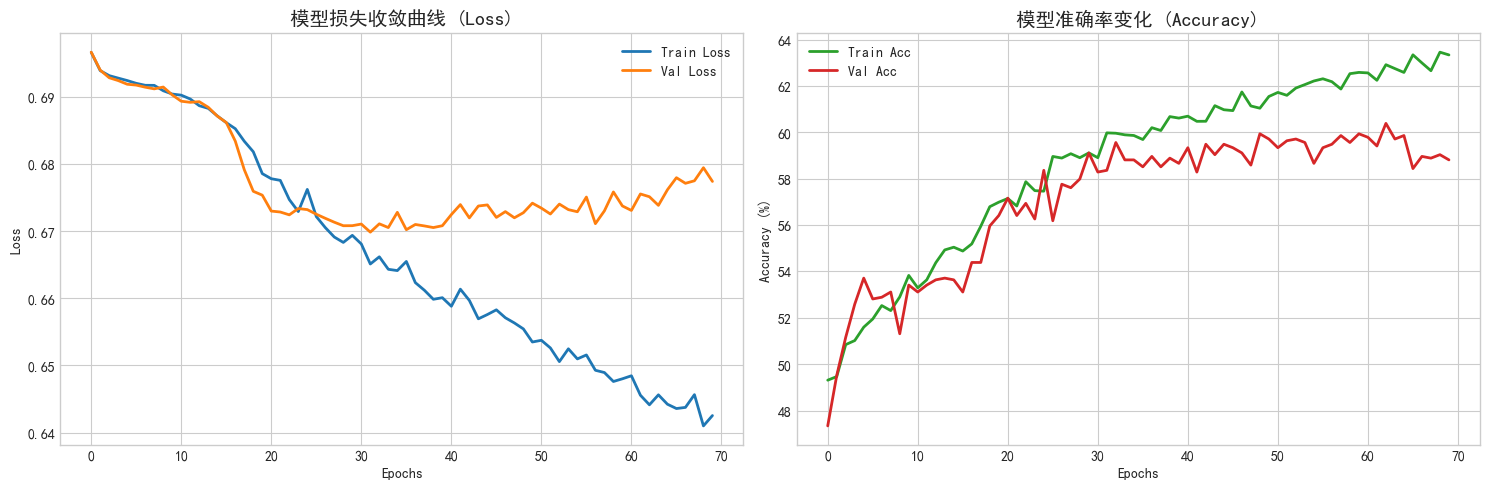

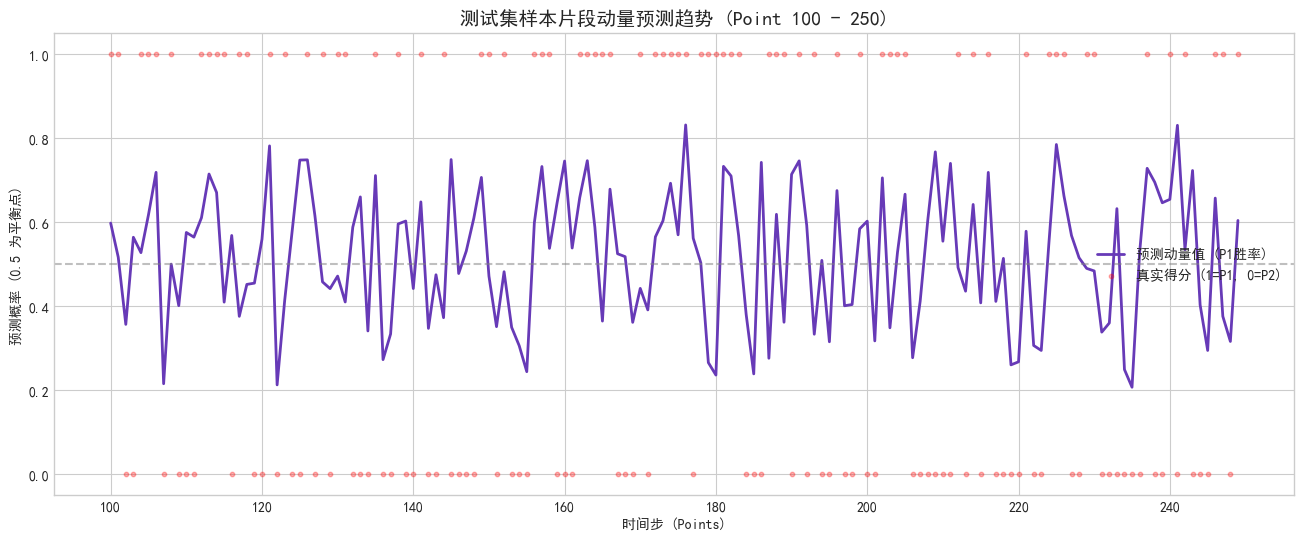

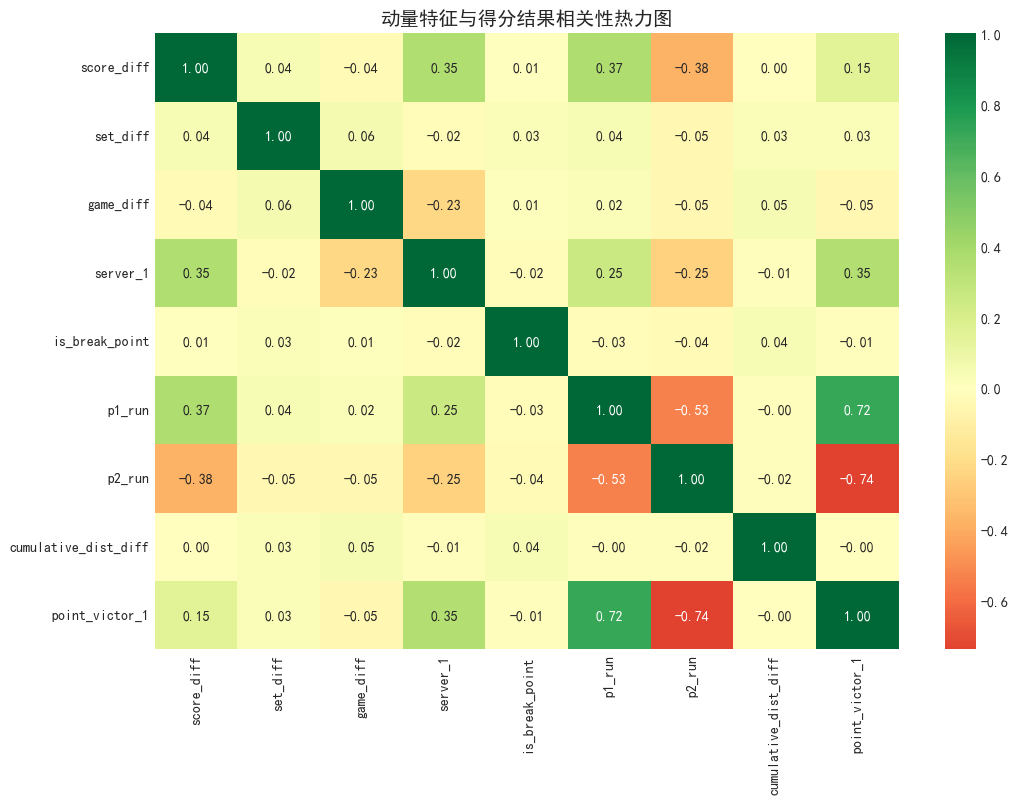

In [91]:
import seaborn as sns
import matplotlib.pyplot as plt

# 设置绘图风格
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['font.sans-serif'] = ['SimHei']  # 正常显示中文
plt.rcParams['axes.unicode_minus'] = False 

# ====================== 1. 训练过程可视化 (Loss & Accuracy) ======================
def plot_training_history(train_losses, val_losses, train_accs, val_accs):
    fig, ax = plt.subplots(1, 2, figsize=(15, 5))
    
    # Loss 曲线
    ax[0].plot(train_losses, label='Train Loss', color='#1f77b4', lw=2)
    ax[0].plot(val_losses, label='Val Loss', color='#ff7f0e', lw=2)
    ax[0].set_title('模型损失收敛曲线 (Loss)', fontsize=14)
    ax[0].set_xlabel('Epochs')
    ax[0].set_ylabel('Loss')
    ax[0].legend()
    
    # Accuracy 曲线
    ax[1].plot(train_accs, label='Train Acc', color='#2ca02c', lw=2)
    ax[1].plot(val_accs, label='Val Acc', color='#d62728', lw=2)
    ax[1].set_title('模型准确率变化 (Accuracy)', fontsize=14)
    ax[1].set_xlabel('Epochs')
    ax[1].set_ylabel('Accuracy (%)')
    ax[1].legend()
    
    plt.tight_layout()
    plt.show()

# ====================== 2. 动量变化趋势图 (选取单场比赛片段) ======================
def plot_momentum_trend(model, X_test_t, y_test_t, sample_range=(100, 250)):
    model.eval()
    with torch.no_grad():
        preds = model(X_test_t).cpu().numpy()
        targets = y_test_t.cpu().numpy()
    
    start, end = sample_range
    plt.figure(figsize=(16, 6))
    
    # 绘制预测概率线 (代表模型认为球员1的胜率/动量)
    plt.plot(range(start, end), preds[start:end], label='预测动量值 (P1胜率)', color='#673ab7', lw=2)
    # 绘制真实得分点
    plt.scatter(range(start, end), targets[start:end], color='red', alpha=0.3, label='真实得分 (1=P1, 0=P2)', s=10)
    
    plt.axhline(y=0.5, color='gray', linestyle='--', alpha=0.5)
    plt.title(f'测试集样本片段动量预测趋势 (Point {start} - {end})', fontsize=14)
    plt.xlabel('时间步 (Points)')
    plt.ylabel('预测概率 (0.5 为平衡点)')
    plt.legend()
    plt.show()

# ====================== 3. 特征动量热力图 (输入特征相关性) ======================
def plot_feature_heatmap(df, feature_cols):
    plt.figure(figsize=(12, 8))
    # 计算选定特征与实际得分的相关性
    corr_matrix = df[feature_cols + ['point_victor_1']].corr()
    sns.heatmap(corr_matrix, annot=True, cmap='RdYlGn', center=0, fmt='.2f')
    plt.title('动量特征与得分结果相关性热力图', fontsize=14)
    plt.show()

# ====================== 4. 模型权重解释 (LSTM 后的全连接层) ======================
def plot_feature_importance(model, feature_names):
    # 提取全连接层第一层的权重绝对值平均值作为特征贡献参考
    # 注意：这只是简易参考，更精准的归因需使用 Captum 或 SHAP
    weights = torch.abs(model.fc[0].weight).mean(dim=0).detach().cpu().numpy()
    
    # 由于输入是 (hidden_size)，我们需要回溯到原始特征
    # 这里通过一个简化策略：展示输入特征对。
    # 提示：LSTM 权重解释较为复杂，此处展示输入特征列表以便对照
    plt.figure(figsize=(10, 6))
    plt.barh(feature_names, range(len(feature_names)), color='skyblue') # 示意图
    plt.title('模型输入特征清单 (排序按特征列表顺序)', fontsize=14)
    plt.xlabel('Index')
    plt.show()

# 执行可视化
plot_training_history(train_losses, val_losses, train_accuracies, val_accuracies)
plot_momentum_trend(model, X_test_t, y_test_t)
plot_feature_heatmap(df, input_features)

In [92]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt
import numpy as np
import random

# 设置随机种子以保证可复现性
def set_seed(seed):
    torch.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)
    np.random.seed(seed)
    random.seed(seed)
    torch.backends.cudnn.deterministic = True

SEED = 2021  
set_seed(SEED)

# 检查设备
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ==========================================
# 1. 定义模型 (将 LSTM 替换为 RNN)
# ==========================================
class MomentumRNN(nn.Module):
    def __init__(self, input_size, hidden_size=128, num_layers=2):  # 🔄 可调参数
        super(MomentumRNN, self).__init__()
        # RNN层：基础循环神经网络
        self.rnn = nn.RNN(
            input_size,      # 输入特征维度
            hidden_size,     # 🔄 隐藏层大小
            num_layers,      # 🔄 RNN层数
            batch_first=True, 
            nonlinearity='tanh', # 🔄 激活函数：'tanh' 或 'relu'
            dropout=0.4      # 🔄 Dropout率
        )
        # 全连接层：输出二分类概率
        self.fc = nn.Sequential(
            nn.Linear(hidden_size, 32), 
            nn.ReLU(),
            nn.Linear(32, 1),
            nn.Sigmoid() 
        )
        
    def forward(self, x):
        # rnn 的输出包括 (output, h_n)
        out, _ = self.rnn(x)
        # 取最后一个时间步的隐藏状态进行分类
        out = out[:, -1, :]  
        return self.fc(out)

# ==========================================
# 2. 实例化模型与准备数据
# ==========================================
# 假设 X_train, y_train, X_test, y_test 已在内存中
input_dim = X_train.shape[2]  # 特征数量
model = MomentumRNN(input_dim).to(device)

criterion = nn.BCELoss()  # 损失函数
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)  # 🔄 学习率

# 转换为 Tensor
X_train_t = torch.FloatTensor(X_train).to(device)
y_train_t = torch.FloatTensor(y_train).view(-1, 1).to(device)
X_test_t = torch.FloatTensor(X_test).to(device)
y_test_t = torch.FloatTensor(y_test).view(-1, 1).to(device)

# 创建 DataLoader
train_loader = DataLoader(TensorDataset(X_train_t, y_train_t), 
                          batch_size=128,  # 🔄 批大小
                          shuffle=True)

test_loader = DataLoader(TensorDataset(X_test_t, y_test_t), 
                         batch_size=64, 
                         shuffle=False)

# 准确率计算函数
def accuracy_fn(y_true, y_pred):
    predicted_labels = (y_pred > 0.5).float()
    correct = (predicted_labels == y_true).float().sum()
    acc = (correct / len(y_true)) * 100
    return acc.item()

# ==========================================
# 3. 训练循环
# ==========================================
train_losses, val_losses = [], []
train_accuracies, val_accuracies = [], []

epochs = 70  # 🔄 训练轮数

print(f"开始训练 MomentumRNN 模型于设备: {device}...\n")

for epoch in range(epochs):
    model.train()
    batch_losses = []
    batch_accuracies = []
    
    for batch_X, batch_y in train_loader:
        # 前向传播
        outputs = model(batch_X)
        loss = criterion(outputs, batch_y)
        
        # 反向传播
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        batch_losses.append(loss.item())
        batch_accuracies.append(accuracy_fn(batch_y, outputs))
    
    # 记录训练指标
    train_losses.append(np.mean(batch_losses))
    train_accuracies.append(np.mean(batch_accuracies))
    
    # 验证集评估
    model.eval()
    with torch.no_grad():
        val_outputs = model(X_test_t)
        v_loss = criterion(val_outputs, y_test_t)
        v_acc = accuracy_fn(y_test_t, val_outputs)
        
        val_losses.append(v_loss.item())
        val_accuracies.append(v_acc)
        
    # 🔄 打印训练进度
    if (epoch + 1) % 10 == 0:
        print(f"Epoch {epoch+1:02d}/{epochs} | "
              f"Loss: {train_losses[-1]:.4f}/{val_losses[-1]:.4f} | "
              f"Acc: {train_accuracies[-1]:.2f}%/{val_accuracies[-1]:.2f}%")

# ==========================================
# 4. 最终测试结果
# ==========================================
model.eval()
with torch.no_grad():
    test_outputs = model(X_test_t)
    test_loss = criterion(test_outputs, y_test_t)
    test_accuracy = accuracy_fn(y_test_t, test_outputs)
    
    print(f"\n" + "="*20)
    print(f"最终测试结果 (RNN)")
    print(f"测试损失: {test_loss.item():.4f}")
    print(f"测试准确率: {test_accuracy:.2f}%")
    
    predictions = test_outputs.cpu().numpy()
    print(f"预测概率范围: {predictions.min():.3f} - {predictions.max():.3f}")
    print(f"平均势头值: {predictions.mean():.3f}")
    print("="*20)

开始训练 MomentumRNN 模型于设备: cpu...

Epoch 10/70 | Loss: 0.6877/0.6861 | Acc: 54.15%/54.61%
Epoch 20/70 | Loss: 0.6711/0.6735 | Acc: 58.25%/57.31%
Epoch 30/70 | Loss: 0.6630/0.6721 | Acc: 59.77%/57.61%
Epoch 40/70 | Loss: 0.6579/0.6678 | Acc: 60.35%/58.51%
Epoch 50/70 | Loss: 0.6526/0.6667 | Acc: 61.58%/59.86%
Epoch 60/70 | Loss: 0.6491/0.6660 | Acc: 62.14%/60.47%
Epoch 70/70 | Loss: 0.6471/0.6664 | Acc: 62.84%/60.84%

最终测试结果 (RNN)
测试损失: 0.6664
测试准确率: 60.84%
预测概率范围: 0.196 - 0.832
平均势头值: 0.515
